In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(file_path, names=columns)

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for Clustering: 0.17750223083350702


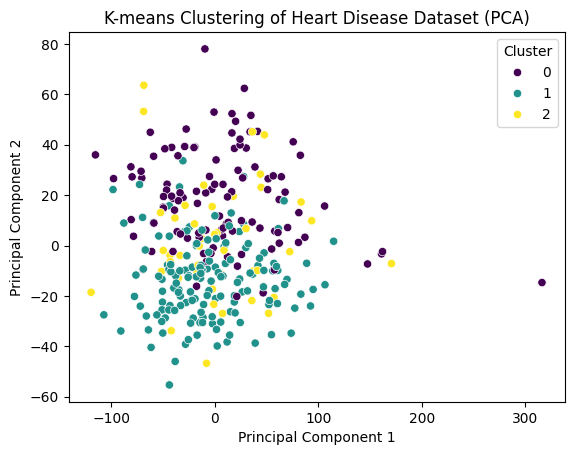

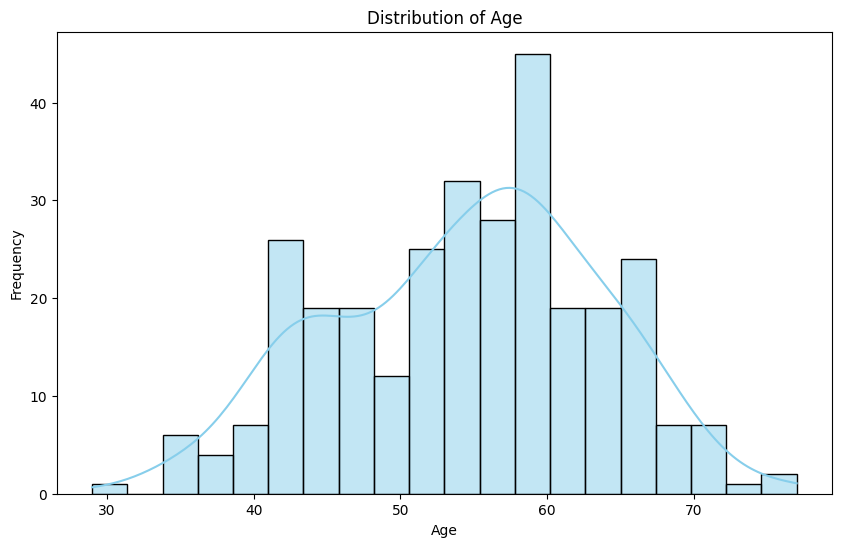

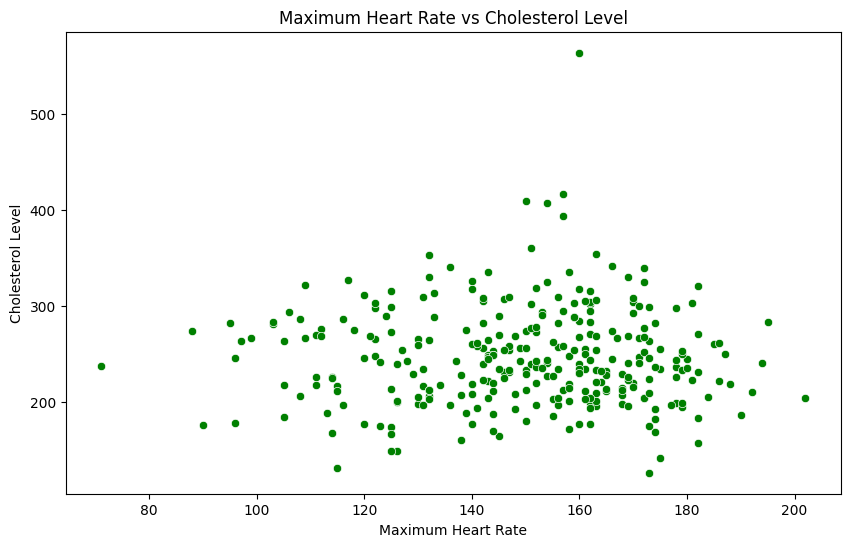

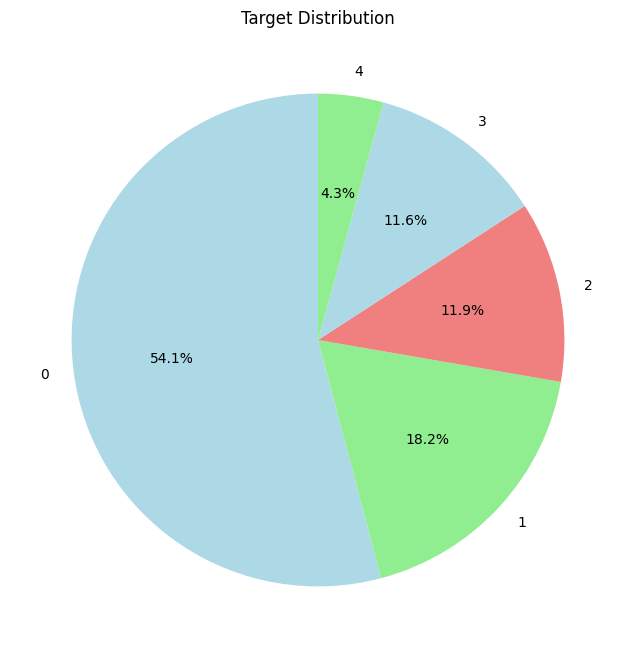

In [8]:
# Clustering
def perform_clustering(X):
    # Data preprocessing
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    return cluster_labels, silhouette_avg

# Visualizations
def visualize_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Classification')
    plt.show()

def visualize_scatter_plot(X, cluster_labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    df_pca = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
    df_pca['Cluster'] = cluster_labels

    sns.scatterplot(data=df_pca, x='Component 1', y='Component 2', hue='Cluster', palette='viridis')
    plt.title('K-means Clustering of Heart Disease Dataset (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def visualize_histogram(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

def visualize_scatterplot(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['thalach'], y=data['chol'], color='green')
    plt.title('Maximum Heart Rate vs Cholesterol Level')
    plt.xlabel('Maximum Heart Rate')
    plt.ylabel('Cholesterol Level')
    plt.show()

def visualize_pie_chart(data):
    plt.figure(figsize=(8, 8))
    sizes = data['target'].value_counts()
    labels = sizes.index
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'], startangle=90)
    plt.title('Target Distribution')
    plt.show()

# Perform Clustering
cluster_labels, silhouette_avg = perform_clustering(data.drop(columns=['target', 'ca', 'thal']))
print("Silhouette Score for Clustering:", silhouette_avg)
visualize_scatter_plot(data.drop(columns=['target', 'ca', 'thal']), cluster_labels)

# Visualize other plots
visualize_histogram(data)
visualize_scatterplot(data)
visualize_pie_chart(data)